In [1]:
import os
import pandas as pd
from tqdm import tqdm
import plotly.express as px
from scipy.optimize import least_squares
from lmfit.models import LorentzianModel, GaussianModel, LinearModel
from matplotlib import pyplot as plt
import numpy as np
import lmfit
from lmfit import Model
import matplotlib as mpl

In [2]:
def get_df_from_dir(directory = "colocated_data_cr_2"):
    files = os.listdir(directory)
    df_list = []
    for file in tqdm(files):
        df_list.append(pd.read_csv(directory + "/" + file))
    return pd.concat(df_list)

def get_heatmap(arg = "wind"):
    fig = px.density_heatmap(df, y="mss", x=arg, color_continuous_scale=px.colors.sequential.Blackbody)
    fig.update_layout(
        xaxis_title= r"$\text{" + arg + "}$",
        yaxis_title= r"$\text{MSS}$",
        legend_title="Legend Title",
        font=dict(
            size=16,
        )
    )
    fig.show()


df = get_df_from_dir("C:/Users/Syver/Desktop/cr1/")

100%|██████████| 1580/1580 [00:15<00:00, 102.89it/s]


In [ ]:
df.corr()

In [ ]:
df = df[df['mss'] < 0.07]
df = df[df['wind'] < 11]
df = df[df['wind'] > 3]
df = df.dropna()
df

In [ ]:
get_heatmap()

In [ ]:
gauss_model(8)

In [15]:
class KatzbergModel(Model):
    def __init__(self, *args, **kwargs):
        def katzberg(x, c_1, c_2, c_3, c_4):
            output = []
            for i in range(len(x)):
                if x[i] <= 3.49:
                    output.append(c_1*(x[i] + c_2))
                else:
                    output.append(c_1*(c_3*np.log(x[i]) + c_4))
            return np.array(output)
                    
        super(KatzbergModel, self).__init__(katzberg, *args, **kwargs)

    def guess(self, data, **kwargs):
        params = self.make_params()
        def pset(param, value):
            params["%s%s" % (self.prefix, param)].set(value=value)
        pset("c_1", 0.0035)
        pset("c_2", 0.62)
        pset("c_3", 6)
        pset("c_4", -3.39)
        return lmfit.models.update_param_vals(params, self.prefix, **kwargs)

In [16]:
model = KatzbergModel()
y = df['mss'].to_numpy()
x = df['wind'].to_numpy()
params = model.guess(y, x=x)
result = model.fit(y, params, x=x)

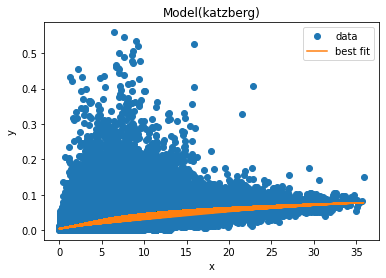

[[Model]]
    Model(katzberg)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 7940977
    # variables        = 4
    chi-square         = 1013.08265
    reduced chi-square = 1.2758e-04
    Akaike info crit   = -71205095.2
    Bayesian info crit = -71205039.7
[[Variables]]
    c_1:  0.00392063 +/- 1.2851e-05 (0.33%) (init = 0.0035)
    c_2:  1.05069081 +/- 0.01147785 (1.09%) (init = 0.62)
    c_3:  6.35048444 +/- 0.02108756 (0.33%) (init = 6)
    c_4: -2.97841438 +/- 0.01177655 (0.40%) (init = -3.39)
[[Correlations]] (unreported correlations are < 0.100)
    C(c_1, c_3) = -0.987
    C(c_1, c_2) = -0.973
    C(c_2, c_3) = 0.960
    C(c_3, c_4) = -0.907
    C(c_1, c_4) = 0.829
    C(c_2, c_4) = -0.806


In [17]:
mpl.rcParams['agg.path.chunksize'] = 10000
result.plot_fit()
plt.show()
print(result.fit_report())

In [ ]:
def gauss_model(x):
    amplitude = 0.56965907 
    sigma = 5.90326384 
    center = 11.3767419  
    frac_1 = amplitude/(sigma*np.sqrt(2*np.pi))
    frac_2 = np.exp((-(x-center)**2)/(2*sigma**2))
    return frac_1/frac_2

In [ ]:
print(result)